## Introduction to K-Nearest Neighbors (KNN)

K-Nearest Neighbors (KNN) is a simple, yet powerful algorithm used in the field of machine learning for both classification and regression tasks. Unlike many machine learning models that involve training and model tuning, KNN is a type of instance-based learning where the function is only approximated locally and all computation is deferred until function evaluation.

### What is KNN?

KNN operates on a very simple principle: it classifies a data point based on how its neighbors are classified. In KNN, data points that are near each other are said to be 'neighbors'. KNN is based on the assumption that similar things exist in close proximity, often referred to as the "First Law of Geography".

### How Does KNN Work?

The KNN algorithm works as follows:
1. **Choose the number of k and a distance metric**: Select the number of neighbors (k) and a distance metric (like Euclidean or Manhattan distance).
2. **Find the k-nearest neighbors**: For a given data point, find the k-nearest neighbors in the training set.
3. **Prediction**: 
   - For classification, predict the most common class among these neighbors.
   - For regression, predict the average of the values of these neighbors.

### Benefits of KNN

- **Simplicity and Versatility**: KNN is easy to understand and can be used for both classification and regression tasks.
- **No Training Phase**: There's no explicit training phase, which can be advantageous in certain scenarios.
- **Adaptability**: KNN can be easily updated with new data.

### Challenges with KNN

- **Computationally Intensive**: The algorithm can be slow, especially when working with large datasets.
- **Sensitive to Irrelevant Features**: KNN can be sensitive to irrelevant or redundant features because all features contribute equally to the similarity.
- **Curse of Dimensionality**: KNN can perform poorly when the number of features is very large.

### Implementing KNN

We typically begin by loading the necessary libraries and preparing our data set for the KNN algorithm.



In [110]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

# Set the Seaborn theme with a specific style and palette
sns.set_theme(style="whitegrid", palette="pastel")

In [111]:
# Import the data - CO2 emissions based on car model and other car properties (Canadian Data)
fuel_df = pd.read_csv("Data/CO2_Emissions_Canada.csv")

# Look at the file
fuel_df

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,11.7,8.6,10.3,27,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,11.2,8.3,9.9,29,232


### Visualizing the Data with Scatter Plots

To gain insights into the CO2 emissions dataset, we will employ scatter plots. These plots are incredibly useful for visual exploration of data, as they allow us to observe relationships between variables.

#### Scatter Plot Analysis

- **Diverse Representation**: We will represent each car make and fuel type with different symbols and colors. This approach helps in distinguishing between various car makes and observing patterns unique to each.
- **Testing Variables**: By varying the x and y-axis values with different dataset features, we can investigate potential groupings or clusters in the data. 
- **Identifying Groups**: Our goal is to identify obvious groups or trends that may exist within the data. These trends can be instrumental in later stages of our analysis.


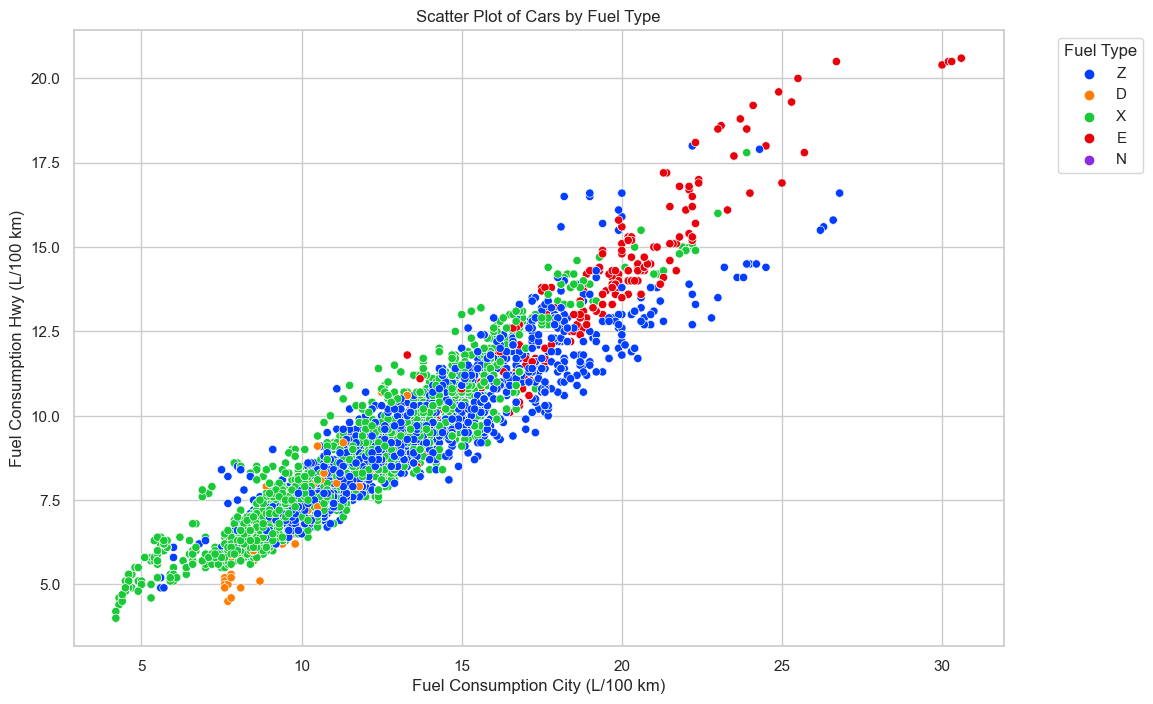

In [112]:
# Create a scatter plot focusing only on Fuel Type
plt.figure(figsize=(12, 8))
sns.scatterplot(data=fuel_df, x='Fuel Consumption City (L/100 km)', y='Fuel Consumption Hwy (L/100 km)', hue='Fuel Type', palette='bright')

# Adding labels and title for clarity
plt.xlabel('Fuel Consumption City (L/100 km)')
plt.ylabel('Fuel Consumption Hwy (L/100 km)')
plt.title('Scatter Plot of Cars by Fuel Type')
plt.legend(title='Fuel Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()


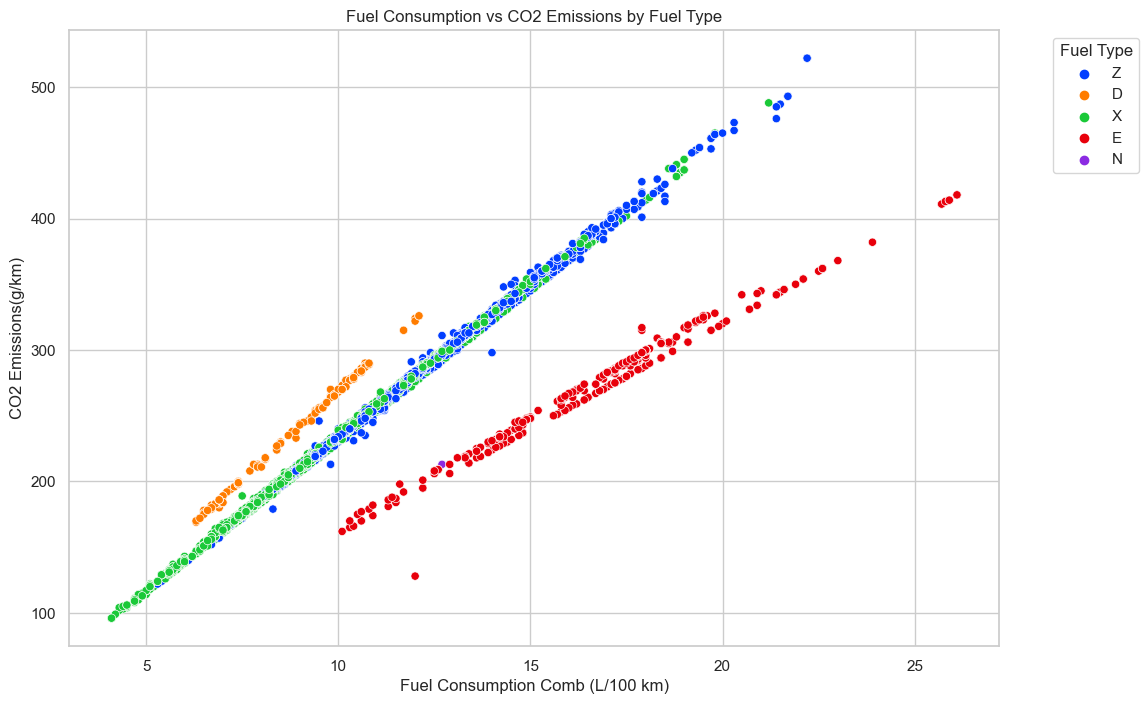

In [113]:
# Create a scatter plot for Fuel Consumption Comb vs CO2 Emissions, colored by Fuel Type
plt.figure(figsize=(12, 8))
sns.scatterplot(data=fuel_df, x='Fuel Consumption Comb (L/100 km)', y='CO2 Emissions(g/km)', hue='Fuel Type', palette='bright')

# Adding labels and title for clarity
plt.xlabel('Fuel Consumption Comb (L/100 km)')
plt.ylabel('CO2 Emissions(g/km)')
plt.title('Fuel Consumption vs CO2 Emissions by Fuel Type')
plt.legend(title='Fuel Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()


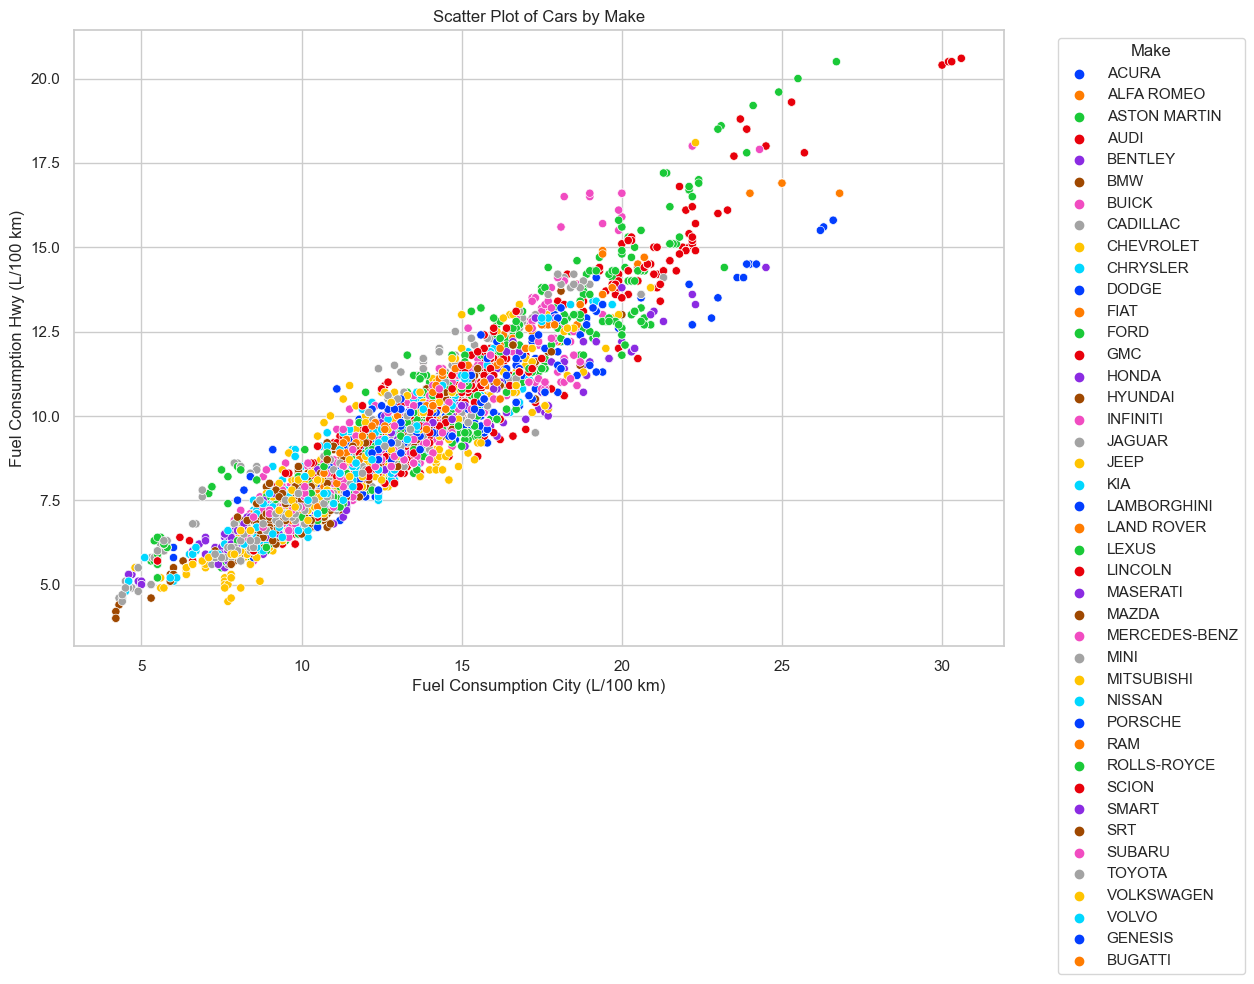

In [114]:
# Create a scatter plot focusing on Car Makes
plt.figure(figsize=(12, 8))
sns.scatterplot(data=fuel_df, x='Fuel Consumption City (L/100 km)', y='Fuel Consumption Hwy (L/100 km)', hue='Make', palette='bright')

# Adding labels and title for clarity
plt.xlabel('Fuel Consumption City (L/100 km)')
plt.ylabel('Fuel Consumption Hwy (L/100 km)')
plt.title('Scatter Plot of Cars by Make')
plt.legend(title='Make', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()


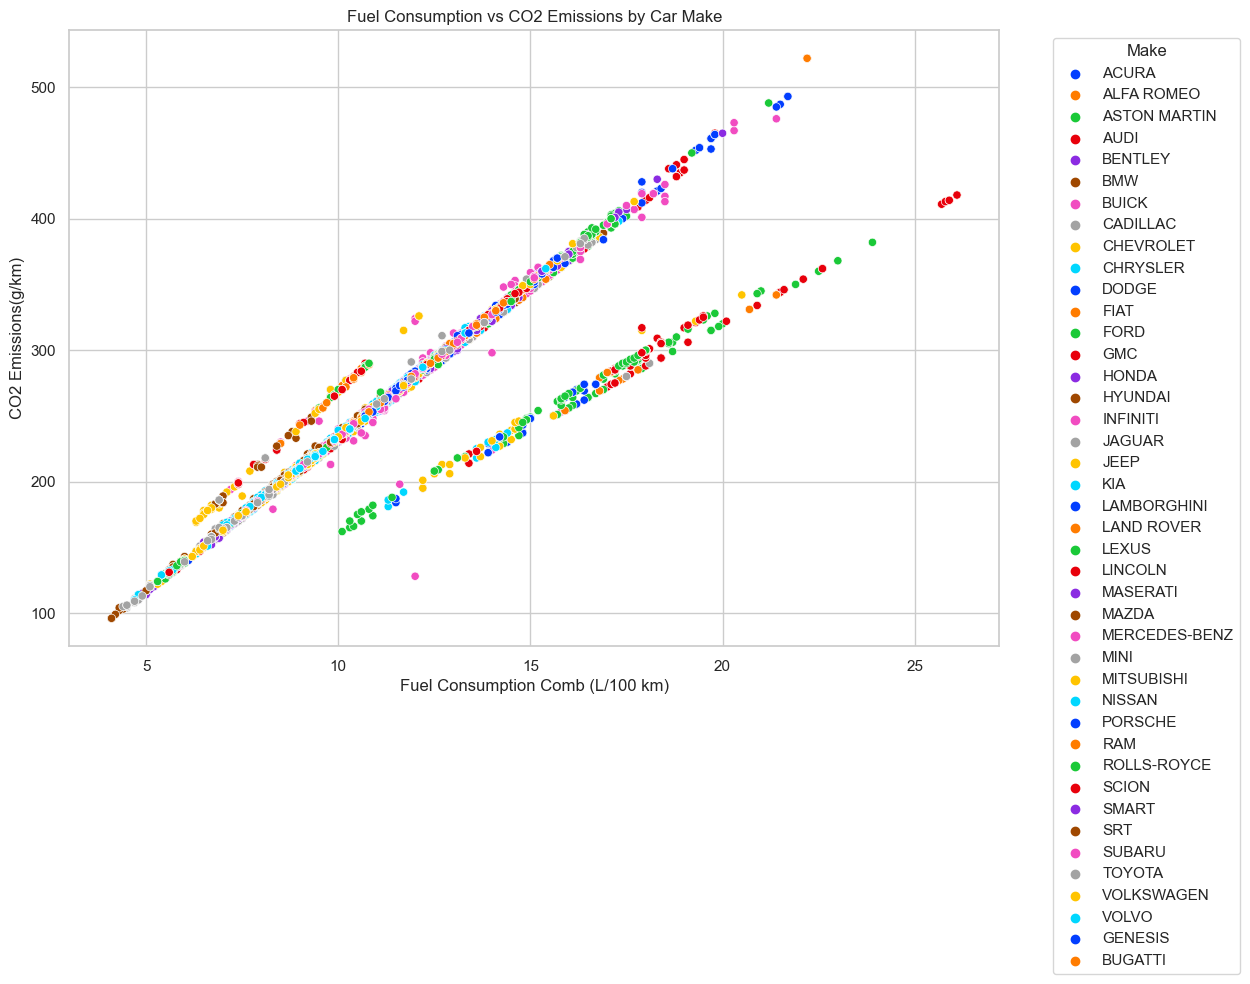

In [115]:
# Create a scatter plot for Fuel Consumption Comb vs CO2 Emissions, colored by Car Make
plt.figure(figsize=(12, 8))
sns.scatterplot(data=fuel_df, x='Fuel Consumption Comb (L/100 km)', y='CO2 Emissions(g/km)', hue='Make', palette='bright')

# Adding labels and title for clarity
plt.xlabel('Fuel Consumption Comb (L/100 km)')
plt.ylabel('CO2 Emissions(g/km)')
plt.title('Fuel Consumption vs CO2 Emissions by Car Make')
plt.legend(title='Make', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()


### Insights from Scatter Plot Analysis

After plotting various scatter graphs with our dataset, some intriguing patterns have emerged. These insights are crucial in guiding the next steps of our analysis.

#### Key Observations

- **Fuel Type as a Differentiator**: One of the most striking observations from the graphs is the role of fuel type. The scatter plots based on fuel type reveal distinct patterns and relationships. This differentiation by fuel type appears to be a significant factor in understanding the data.
- **Focus on Fuel Types**: Given the prominence of fuel type in our initial analysis, it makes sense to focus our subsequent analysis on comparing different fuel types. This approach will allow us to delve deeper into how fuel type influences CO2 emissions and other vehicle attributes.

#### Considerations for Further Analysis

- **Balanced Group Sizes**: An important consideration in our analysis will be to ensure that the groups (different fuel types) are of relatively equal sizes. This balance is necessary to avoid biases in our analysis and to ensure that each fuel type is adequately represented.
- **Equal Data Points**: Striving for a similar number of data points for each fuel type will help in making more accurate comparisons and inferences.

I will normalize the data and reduce the size of the data to be more manageable. To begin, I will look at the number of instances of each fuel type:

In [116]:
# Normalize the "Fuel Consumption Comb (L/100 km)" column
max_fuel_consumption = fuel_df['Fuel Consumption Comb (L/100 km)'].max()
fuel_df['Fuel Consumption Comb (L/100 km)'] /= max_fuel_consumption

# Normalize the "CO2 Emissions(g/km)" column
max_co2_emissions = fuel_df['CO2 Emissions(g/km)'].max()
fuel_df['CO2 Emissions(g/km)'] /= max_co2_emissions

# Count the number of instances of each fuel type
fuel_type_counts = fuel_df['Fuel Type'].value_counts()

# Display the counts
print(fuel_type_counts)


X    3637
Z    3202
E     370
D     175
N       1
Name: Fuel Type, dtype: int64


Let's take 100 samples from each group while removing the "N" Fuel Type

In [117]:
# Filter out the 'N' fuel type
filtered_fuel_df = fuel_df[fuel_df['Fuel Type'] != 'N']

# Sample 175 instances from each fuel type
sampled_df = filtered_fuel_df.groupby('Fuel Type').sample(n=175, random_state=1)

# Reset the index of the sampled dataframe
sampled_df = sampled_df.reset_index(drop=True)

# Display the sampled dataframe
sampled_df


,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,CHEVROLET,CRUZE DIESEL,COMPACT,1.6,4,M6,D,7.7,4.5,0.241379,45,0.323755
1,FORD,F-150 4X4,PICKUP TRUCK - STANDARD,3.0,6,AS10,D,11.8,9.3,0.409962,26,0.551724
2,VOLKSWAGEN,BEETLE TDI (modified),COMPACT,2.0,4,M6,D,8.8,6.1,0.295019,37,0.398467
3,CHEVROLET,COLORADO,PICKUP TRUCK - SMALL,2.8,4,A6,D,10.8,7.7,0.360153,30,0.482759
4,VOLKSWAGEN,GOLF SPORTWAGON TDI (modified),STATION WAGON - SMALL,2.0,4,AM6,D,7.6,5.6,0.256705,42,0.344828
...,...,...,...,...,...,...,...,...,...,...,...,...
695,MAZDA,MX-5 (SIL),TWO-SEATER,2.0,4,M6,Z,9.0,7.0,0.310345,35,0.362069
696,HONDA,CIVIC HATCHBACK,FULL-SIZE,1.5,4,AV7,Z,7.9,6.6,0.279693,39,0.325670
697,VOLKSWAGEN,CC,COMPACT,2.0,4,A6,Z,11.1,7.9,0.371648,29,0.427203
698,MERCEDES-BENZ,GLE 550 4MATIC,SUV - STANDARD,4.7,8,AS7,Z,16.2,11.8,0.544061,20,0.641762


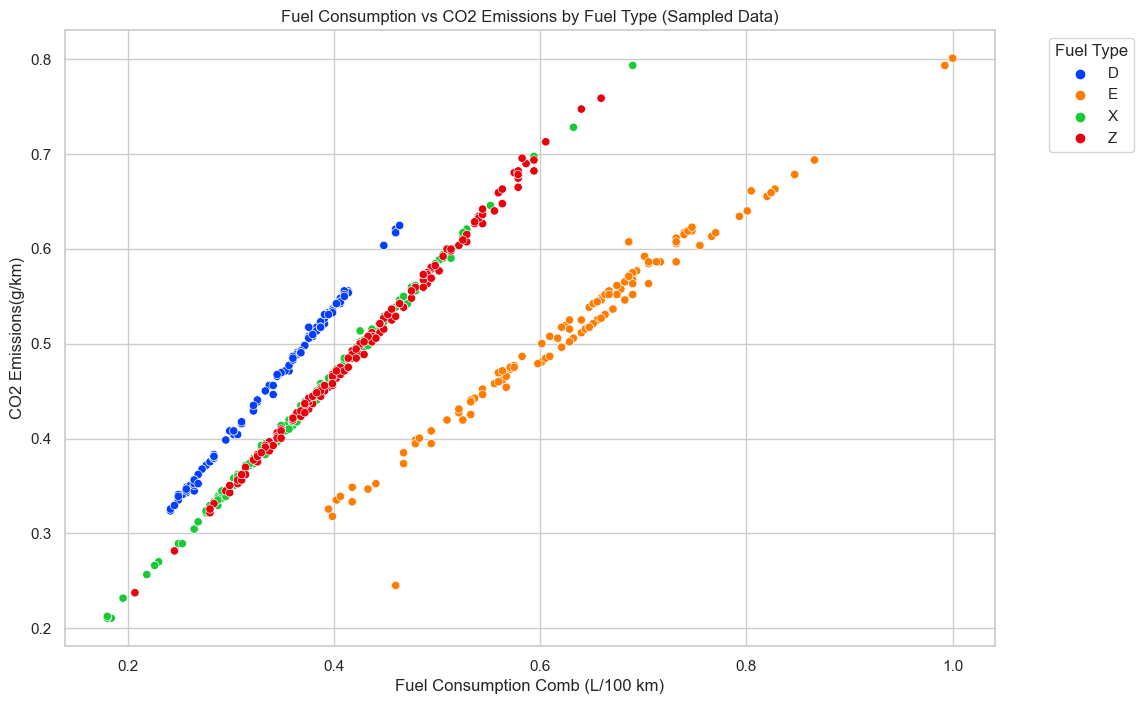

In [118]:
# Create a scatter plot for Fuel Consumption Comb vs CO2 Emissions, colored by Fuel Type
plt.figure(figsize=(12, 8))
sns.scatterplot(data=sampled_df, x='Fuel Consumption Comb (L/100 km)', y='CO2 Emissions(g/km)', hue='Fuel Type', palette='bright')

# Adding labels and title for clarity
plt.xlabel('Fuel Consumption Comb (L/100 km)')
plt.ylabel('CO2 Emissions(g/km)')
plt.title('Fuel Consumption vs CO2 Emissions by Fuel Type (Sampled Data)')
plt.legend(title='Fuel Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()


### Overlap Between Fuel Types X and Z

We've observed a noticeable overlap between the X and Z fuel types in our scatter plots. This finding is significant as it might influence the error rate in our model, particularly when applying classification algorithms. 


We will now be splitting the sampled data into training and testing data (75% and 25% respectively) to effectively test the performance of our model on real data.

In [119]:
from sklearn.model_selection import train_test_split

# Selecting the features and the target
X = sampled_df[["Fuel Consumption Comb (L/100 km)", "CO2 Emissions(g/km)"]].to_numpy()
y = sampled_df["Fuel Type"].to_numpy()

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)


We will use euclidian distance for a distance measure, but there are different choices for distance (We could play around with this).

In [120]:
def distance(p, q):
    return np.sqrt((p - q) @ (p - q))

print(f"The distance between point 10 and 67 is {distance(X[10], X[67])}")

The distance between point 10 and 67 is 0.19619888714675723


### K-Nearest Neighbors Function

The `k_nearest_neighbors` function is designed to find the k closest neighbors to a given point in a dataset. Here's how it works:

- **Function Parameters**: It takes four parameters: a `point` for which we want to find the neighbors, `training_features` and `training_labels` representing our dataset, and `k` specifying the number of neighbors to find.
- **Calculating Distances**: For each point in the training set, the function calculates the distance to the target point using a `distance` function.
- **Storing Neighbors**: Each neighbor, along with its label and calculated distance, is stored in a list.
- **Sorting and Selecting Neighbors**: The list of neighbors is sorted based on the distance, and the top k neighbors are returned.

This function is a core component of the KNN algorithm, enabling the identification of nearest neighbors based on the chosen distance metric.


In [121]:
def k_nearest_neighbors(point, 
                        training_features, 
                        training_labels, 
                        k):
    # Create an empty list to store neighbors and distances
    neighbors = []
    
    for p, label in zip(training_features, training_labels):
        d = distance(point, p)
        temp_data = [p, label, d]
        neighbors.append(temp_data)
    
    # Sort by the last entry of the data(distance)
    neighbors.sort(key = lambda x : x[-1])
    
    return neighbors[:k]

Test the function on a random point (the last point in this case).

In [122]:
# Test the k_nearest_neighbors function
k_nearest_neighbors(X_test[-1], X_train, y_train, 30)

[[array([0.26436782, 0.35632184]), 'D', 0.0],
 [array([0.26436782, 0.35632184]), 'D', 0.0],
 [array([0.26436782, 0.35632184]), 'D', 0.0],
 [array([0.26436782, 0.35632184]), 'D', 0.0],
 [array([0.26436782, 0.35440613]), 'D', 0.0019157088122605526],
 [array([0.26436782, 0.35249042]), 'D', 0.003831417624521105],
 [array([0.26819923, 0.35249042]), 'D', 0.0054184427677130146],
 [array([0.26819923, 0.35249042]), 'D', 0.0054184427677130146],
 [array([0.26436782, 0.35057471]), 'D', 0.005747126436781602],
 [array([0.26819923, 0.36206897]), 'D', 0.006907186351463562],
 [array([0.26819923, 0.36206897]), 'D', 0.006907186351463562],
 [array([0.25670498, 0.3467433 ]), 'D', 0.012266521527649161],
 [array([0.25670498, 0.3467433 ]), 'D', 0.012266521527649161],
 [array([0.25670498, 0.3467433 ]), 'D', 0.012266521527649161],
 [array([0.27203065, 0.36781609]), 'D', 0.013814372702927125],
 [array([0.27203065, 0.36781609]), 'D', 0.013814372702927125],
 [array([0.25670498, 0.34482759]), 'D', 0.013814372702927

There are clearly some duplicates in the data, I will begin by removing the duplicates, then resampling the data.

In [123]:
print(f"Dataset shape before removing duplicates: {fuel_df.shape}")


# Remove duplicates from the dataset
fuel_df = fuel_df.drop_duplicates()

# Display the shape of the dataset after removing duplicates
print(f"Dataset shape after removing duplicates: {fuel_df.shape}")


Dataset shape before removing duplicates: (7385, 12)
Dataset shape after removing duplicates: (6282, 12)


I resample the data to have 100 data points for each fuel type and split the data into training and testing data once again.

In [124]:
# Filter out the 'N' fuel type
filtered_fuel_df = fuel_df[fuel_df['Fuel Type'] != 'N']

# Sample 100 instances from each fuel type
sampled_df = filtered_fuel_df.groupby('Fuel Type').sample(n=100, random_state=1)

# Reset the index of the sampled dataframe
sampled_df = sampled_df.reset_index(drop=True)

# Display the shape of the sampled dataframe
print(f"Sampled dataframe shape: {sampled_df.shape}")

# Selecting the features and the target
X = sampled_df[["Fuel Consumption Comb (L/100 km)", "CO2 Emissions(g/km)"]].to_numpy()
y = sampled_df["Fuel Type"].to_numpy()

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)





Sampled dataframe shape: (400, 12)


In [125]:
# Test the k_nearest_neighbors function
k_nearest_neighbors(X_test[-1], X_train, y_train, 30)

[[array([0.73180077, 0.61111111]), 'E', 0.008567310258619808],
 [array([0.73180077, 0.61111111]), 'E', 0.008567310258619808],
 [array([0.73180077, 0.60727969]), 'E', 0.01083688553542595],
 [array([0.73180077, 0.60727969]), 'E', 0.01083688553542595],
 [array([0.73180077, 0.60536398]), 'E', 0.012266521527649083],
 [array([0.74712644, 0.62452107]), 'E', 0.01226652152764917],
 [array([0.75095785, 0.62452107]), 'E', 0.014962164130089418],
 [array([0.76628352, 0.61302682]), 'E', 0.02688825449735277],
 [array([0.70114943, 0.59195402]), 'E', 0.04468162371528964],
 [array([0.70498084, 0.5862069 ]), 'E', 0.04488649239026819],
 [array([0.70498084, 0.58429119]), 'E', 0.04613637769652221],
 [array([0.7164751 , 0.57279693]), 'E', 0.04800752523425932],
 [array([0.68582375, 0.60727969]), 'E', 0.054184427677130186],
 [array([0.69348659, 0.57662835]), 'E', 0.05984865652035754],
 [array([0.70498084, 0.56321839]), 'E', 0.06216467716317226],
 [array([0.70498084, 0.56321839]), 'E', 0.06216467716317226],
 [a

### Update on Algorithm Retesting

Upon further evaluation of the algorithm, I've noticed the persistence of some duplicate entries. This phenomenon appears to be linked to similar car models yielding comparable results in our dataset. Acknowledging this aspect, I've decided to proceed with the current data, recognizing that these similarities reflect inherent characteristics of the dataset.


### KNN Prediction Function: `KNN_Predict`

The `KNN_Predict` function is a versatile tool within the K-Nearest Neighbors framework, capable of handling both classification and regression tasks. Its role is to predict the output for a given input point based on the data from nearest neighbors.

#### Function Overview

- **Inputs**: It takes a target `point`, `training_features` and `training_labels` as the training dataset, the number of neighbors `k`, and a boolean `regression` flag.
- **Finding Neighbors**: The function starts by calling `k_nearest_neighbors` to find the k closest neighbors to the target point.
- **Classification Mode**: When `regression` is False, it operates in classification mode. In this mode, the function identifies the most common label among the neighbors, making it ideal when `k` is odd to avoid ties.
- **Regression Mode**: If `regression` is True, the function switches to regression mode. Here, it calculates the average of the neighbor labels, providing a prediction based on the mean of the nearest data points.


In [127]:
def KNN_Predict(point, 
                training_features, 
                training_labels, 
                k, 
                regression = False):
    
    neighbors = k_nearest_neighbors(point, 
                                    training_features, 
                                    training_labels, 
                                    k)
    
    if regression == False:
        labels = [x[1] for x in neighbors]
        # Return the most common label among the neighbors (why k must be odd)
        return max(labels, key = labels.count)
    
    else:
        return sum(x[1] for x in neighbors)/k

Test the function

In [128]:
# Predict the label for X_test[20]
predicted_label = KNN_Predict(X_test[5], X_train, y_train, 9)

# Retrieve the actual label
actual_label = y_test[20]

# Print both labels for comparison
print(f"Predicted Label: {predicted_label}")
print(f"Actual Label: {actual_label}")

# Check if the prediction was correct
correct_prediction = predicted_label == actual_label
print(f"Was the prediction correct? {correct_prediction}")


Predicted Label: X
Actual Label: E
Was the prediction correct? False


### `classification_error` Function

This function calculates the error rate of a KNN classifier. It compares predicted labels from the KNN model with actual labels in the test dataset, returning the proportion of misclassified points.


In [129]:
def classification_error(test_features, 
                         test_labels,
                         training_features, 
                         training_labels,
                         k):
    error = 0
    for point, label in zip(test_features, test_labels):
        error += label != KNN_Predict(point, 
                                      training_features, 
                                      training_labels, 
                                      k)
    return error/len(test_features)

In [130]:
# Calculate the classification error for the KNN model
error_rate = classification_error(X_test, y_test, X_train, y_train, k=5)

# Print the error rate
print(f"Classification Error Rate: {error_rate}")


Classification Error Rate: 0.23


### Error Rate Assessment

The obtained error rate is not very satisfactory. To explore potential improvements, we will conduct an error analysis below and assess whether adjusting the `k` value can enhance the model's performance.


In [131]:
possible_k = [k for k in range(3, 26, 2)]
errors = [classification_error(X_test,
                               y_test,
                               X_train,
                               y_train, k) for k in possible_k]

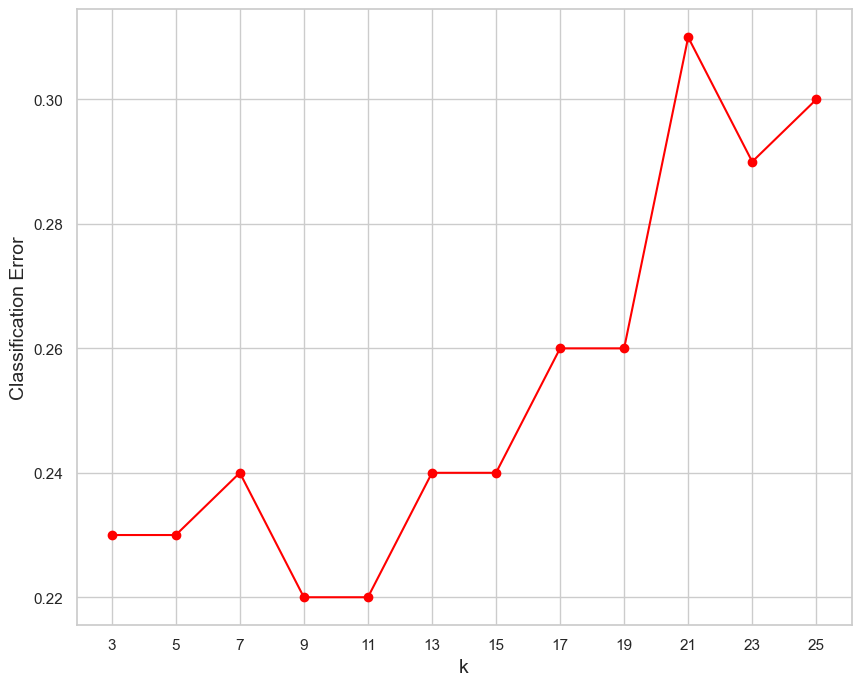

In [132]:
plt.figure(figsize = (10, 8))
plt.plot(possible_k, errors, color = 'red', marker = "o")
plt.xlabel('k', fontsize = 14)
plt.ylabel('Classification Error', fontsize = 14)
plt.xticks(possible_k)
plt.show()

The error may be because of the heavy overlap between Fuel type X and Z. I will remove fuel type X to see if the error is reduced significantly.

In [133]:
# Remove entries of Type 'X' from the sampled dataset
sampled_df_without_X = sampled_df[sampled_df['Fuel Type'] != 'X']

# Display the shape of the new dataframe
print(f"New dataframe shape after removing Type 'X': {sampled_df_without_X.shape}")

# Selecting the features and the target
X = sampled_df_without_X[["Fuel Consumption Comb (L/100 km)", "CO2 Emissions(g/km)"]].to_numpy()
y = sampled_df_without_X["Fuel Type"].to_numpy()

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)


New dataframe shape after removing Type 'X': (300, 12)


In [134]:
# Calculate the classification error for the KNN model
error_rate = classification_error(X_test, y_test, X_train, y_train, k=3)

# Print the error rate
print(f"Classification Error Rate: {error_rate}")

Classification Error Rate: 0.0


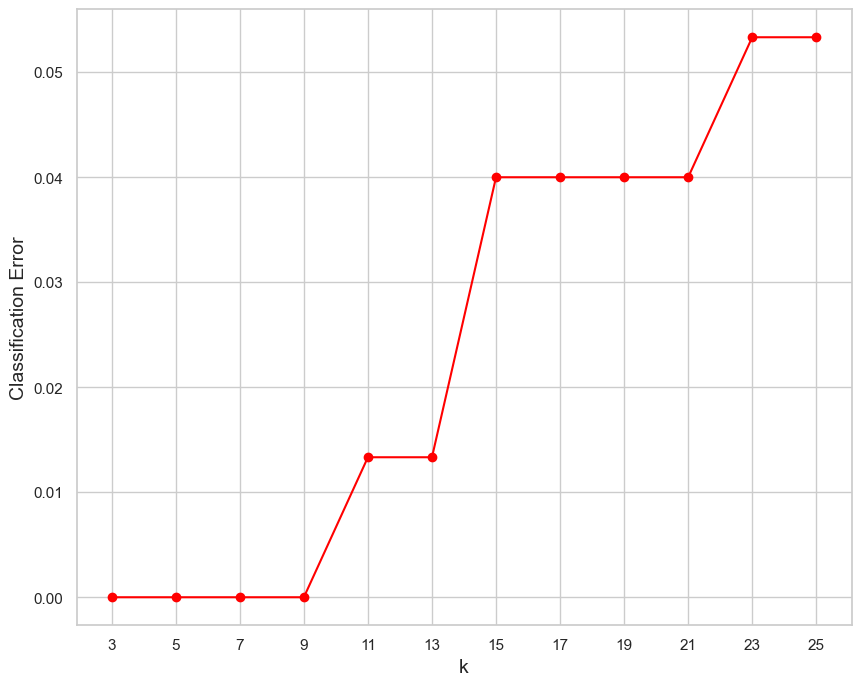

In [135]:
possible_k = [k for k in range(3, 26, 2)]
errors = [classification_error(X_test,
                               y_test,
                               X_train,
                               y_train, k) for k in possible_k]

plt.figure(figsize = (10, 8))
plt.plot(possible_k, errors, color = 'red', marker = "o")
plt.xlabel('k', fontsize = 14)
plt.ylabel('Classification Error', fontsize = 14)
plt.xticks(possible_k)
plt.show()

### Final Result

We've observed an intriguing result: after excluding fuel type X from the dataset, the classification error rate improved significantly, reaching 0 for values of k from 3 to 9. This suggests that a value of 3 for k is a strong indicator for optimal model performance in this modified context.
